This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

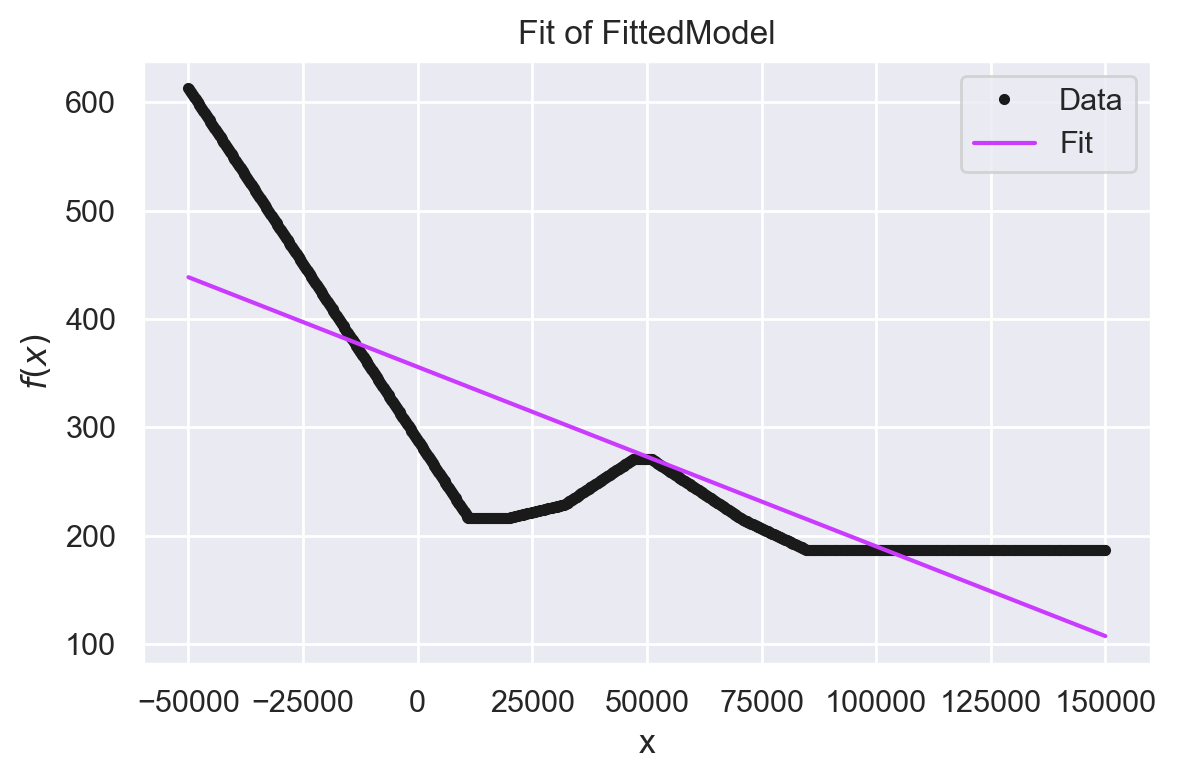

In [5]:
from aerosandbox.atmosphere import Atmosphere
from aerosandbox.modeling import FittedModel
import aerosandbox.numpy as np
from aerosandbox.modeling.interpolation import InterpolatedModel
altitude = np.linspace(-50e3, 150e3, 1000)
atmo_isa = Atmosphere(altitude=altitude, type="isa")
### Fit the temperature
temperature_isa = atmo_isa.temperature()
pressure_isa=atmo_isa.pressure()
def model(x, p):
    return p["m"] * x + p["b"]
fitted_model = FittedModel(
    model=model,
    x_data=altitude,
    y_data=temperature_isa,
    parameter_guesses={
        "m": 0,
        "b": 0
    }
)
fitted_model.plot()

In [7]:
pressure_isa=atmo_isa.pressure()
logs_pressure=np.log(pressure_isa)
scaled_altitude=altitude/10000
def model1(x, p):
    return p["c1"] + p["c2"] * x  +p['c3']*x**2 +p['c4']*x**3 +p['c5']*x**4
#+p['c6']*x**5+p['c7']*x**6+p['c8']*x**7
fitted_model = FittedModel(
    model=model1,
    x_data=scaled_altitude,
    y_data=logs_pressure,
    parameter_guesses={
        "c1": 0,
        "c2": 0,
        "c3": 0,
        "c4": 0,
        "c5": 0,
        "c6": 0,
        "c7": 0,
        "c8": 0,

    }
)



This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [106]:
fitted_model.parameters

{'c1': 11.318062834665673,
 'c2': -1.184585077322501,
 'c3': -0.052862579221928975,
 'c4': 0.003206011571905896,
 'c5': -0.00011112465448768574,
 'c6': nan,
 'c7': nan,
 'c8': nan}

In [107]:
fitted_model.goodness_of_fit()

0.999652685158031

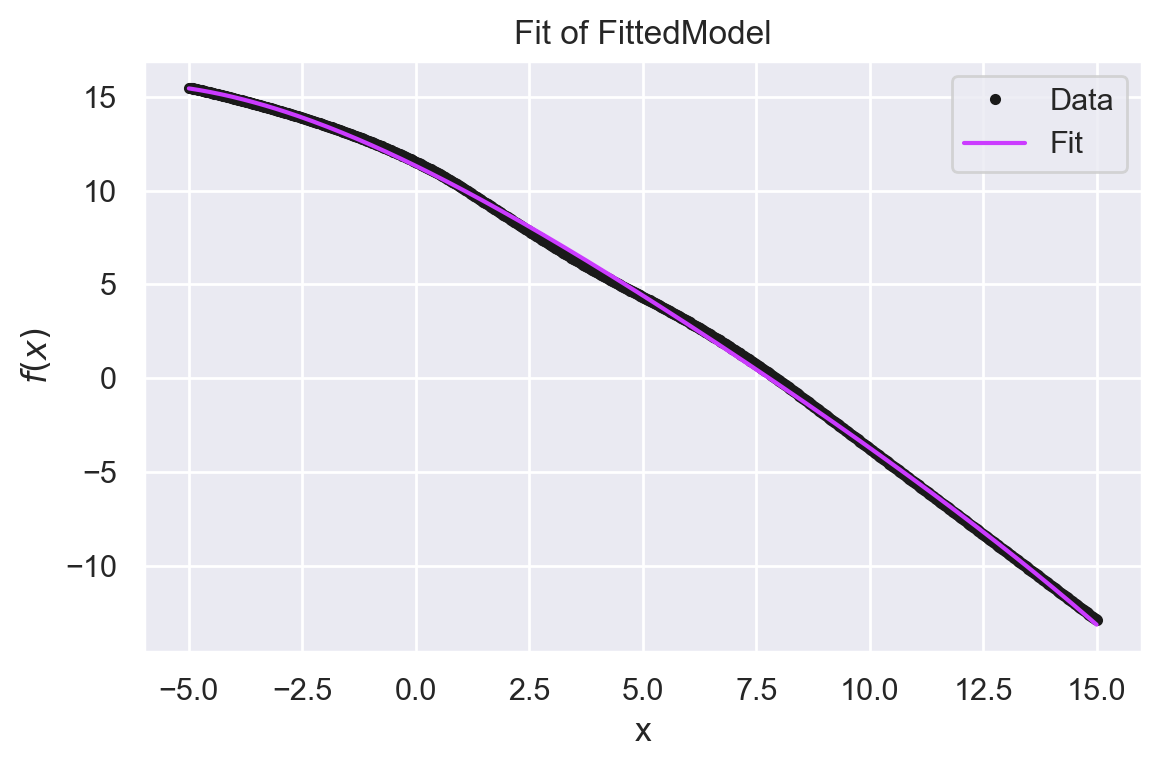

In [108]:
fitted_model.plot()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

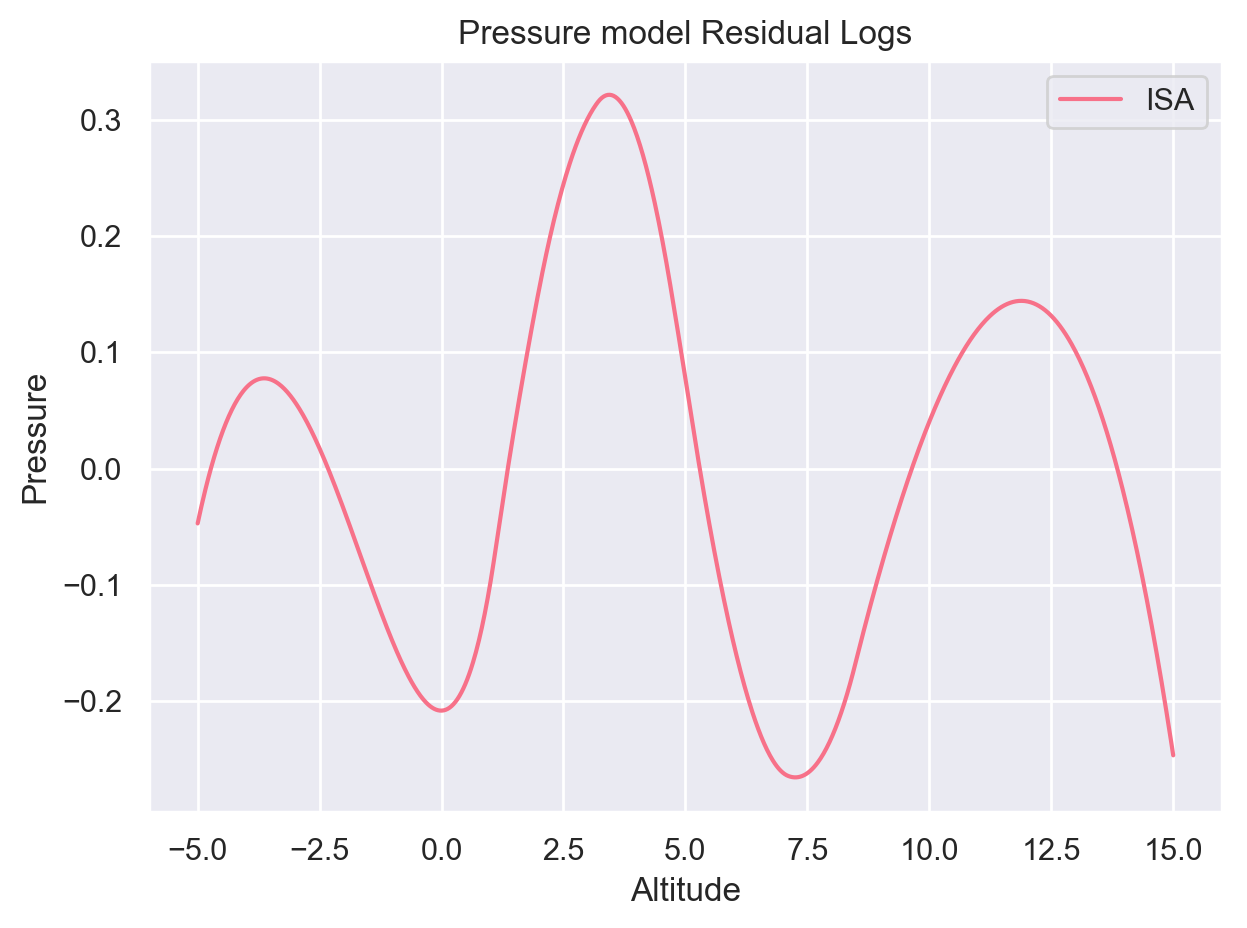

In [109]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(scaled_altitude, fitted_model(scaled_altitude)-logs_pressure, label="ISA")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Residual Logs")
plt.tight_layout()
plt.legend()
plt.show()

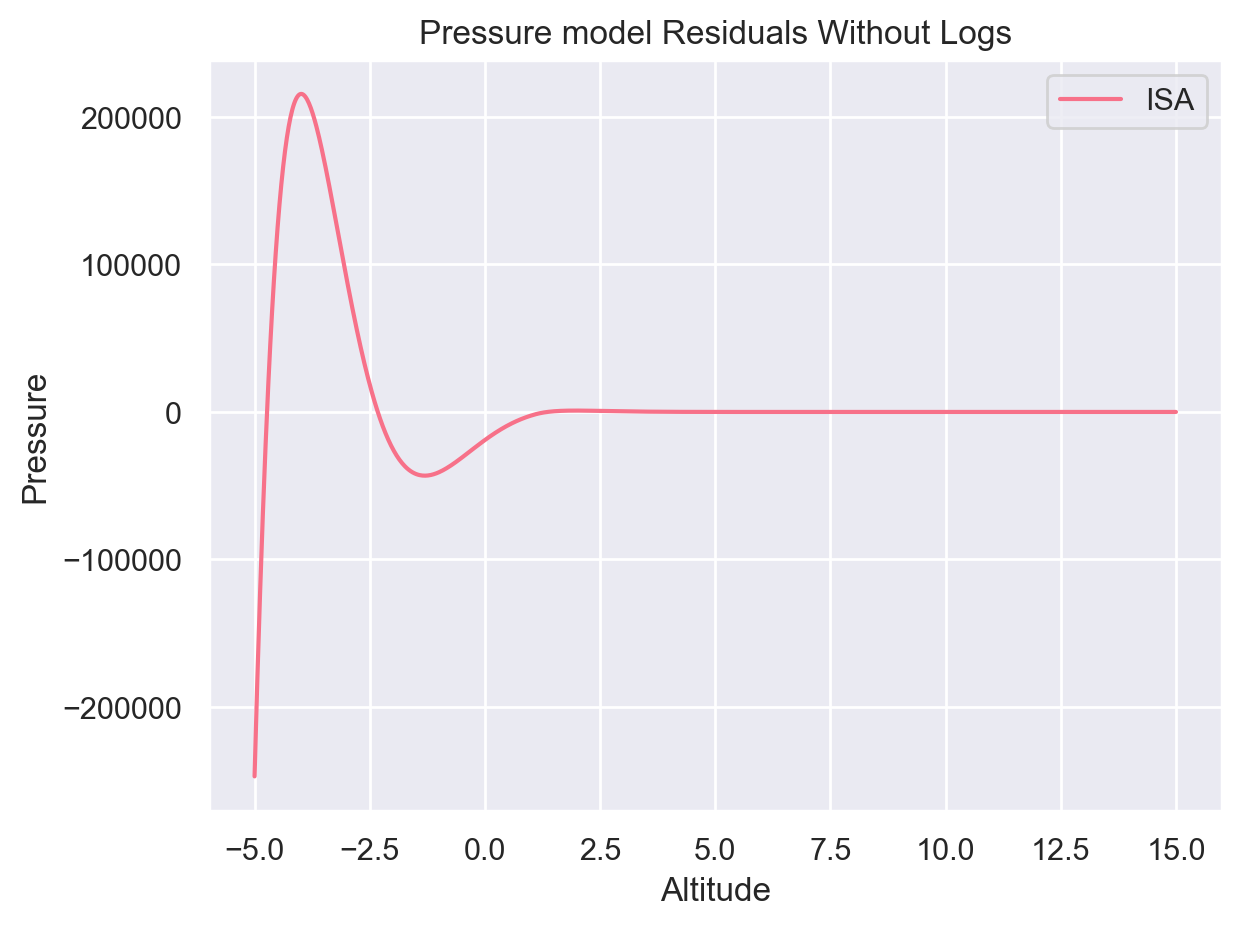

In [110]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(scaled_altitude, np.exp(fitted_model(scaled_altitude))-pressure_isa, label="ISA")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Residuals Without Logs")
plt.tight_layout()
plt.legend()
plt.show()

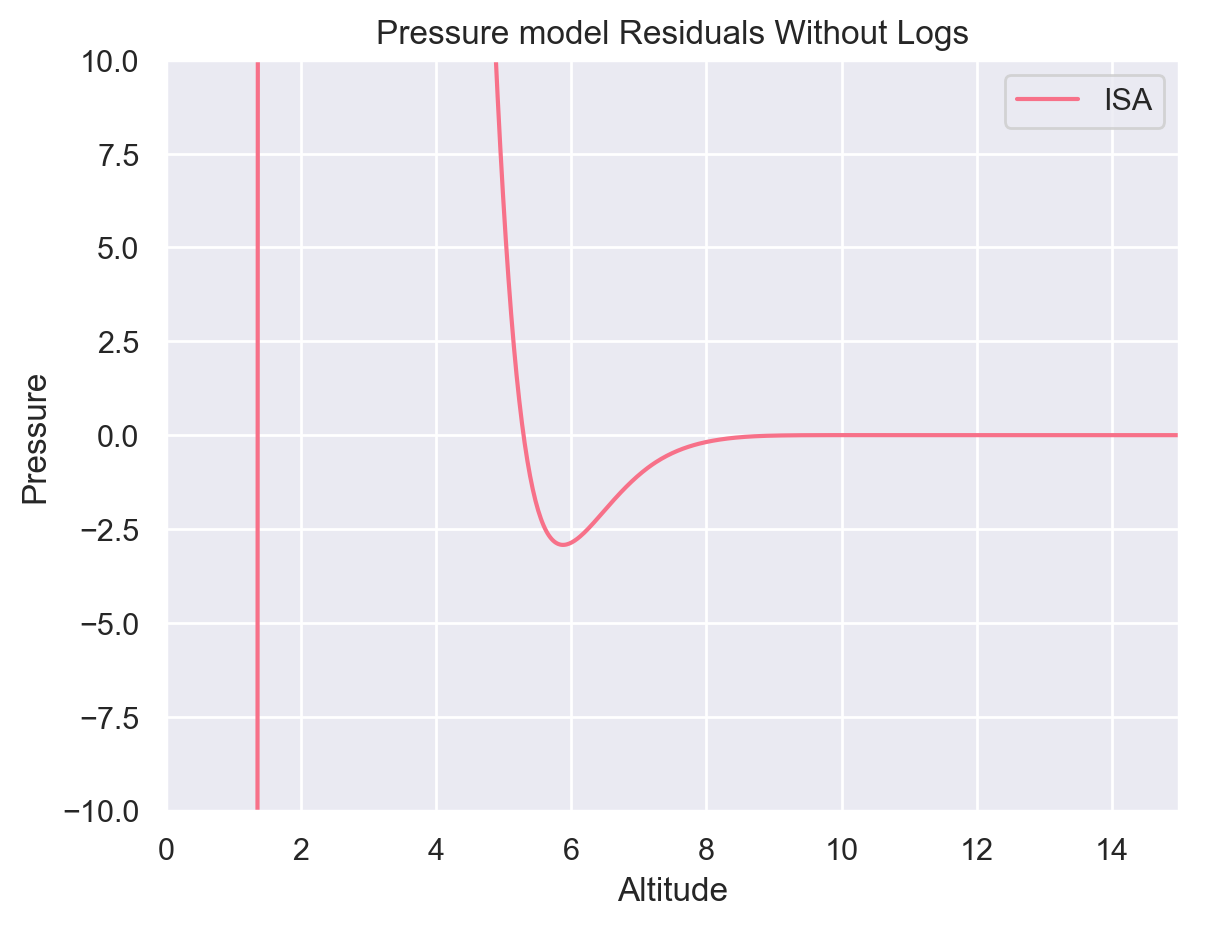

In [111]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(scaled_altitude, np.exp(fitted_model(scaled_altitude))-pressure_isa, label="ISA")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Residuals Without Logs")
plt.tight_layout()
plt.legend()
plt.xlim([0, 15])
plt.ylim([-10, 10])
plt.show()

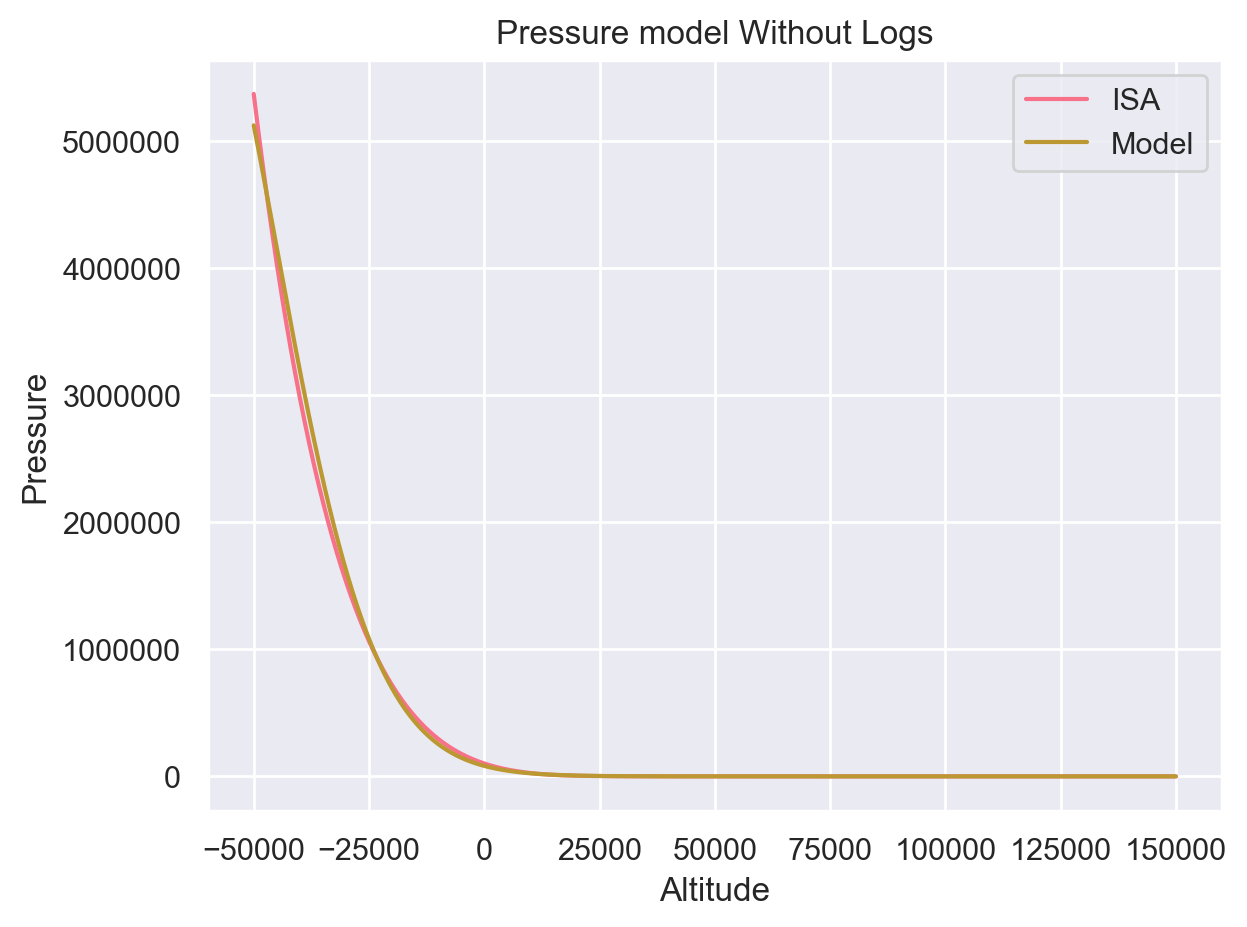

In [112]:

sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, pressure_isa, label="ISA")
plt.plot(altitude, np.exp(fitted_model(scaled_altitude)), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Pressure")
plt.title(r"Pressure model Without Logs")
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
logs_temperature=np.log(temperature_isa)
def model2(x, p):
    return (p["c1"] + p["c2"] * x+p['c3']*x**2)/(p["c5"] + p["c6"] * x  +p['c7']*x**2)+p['c9']
fitted_model_temp = FittedModel(
    model=model2,
    x_data=scaled_altitude,
    y_data=logs_temperature,
    parameter_guesses={
        "c1": 0,
        "c2": 0,
        "c3": 0,
        "c4": 0,
        "c5": 1,
        "c6": 1,
        "c7": 1,
        "c8": 1,
        "c9": 0,

    }
)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [151]:
fitted_model_temp.goodness_of_fit()

0.9400878980725803

In [152]:
fitted_model_temp.parameters

{'c1': 0.2769841756833447,
 'c2': 0.0727619018794497,
 'c3': 0.006416824757606634,
 'c4': nan,
 'c5': 0.05899797098239521,
 'c6': 0.01686154827299248,
 'c7': 0.001562256706663073,
 'c8': nan,
 'c9': 0.9917216126267276}

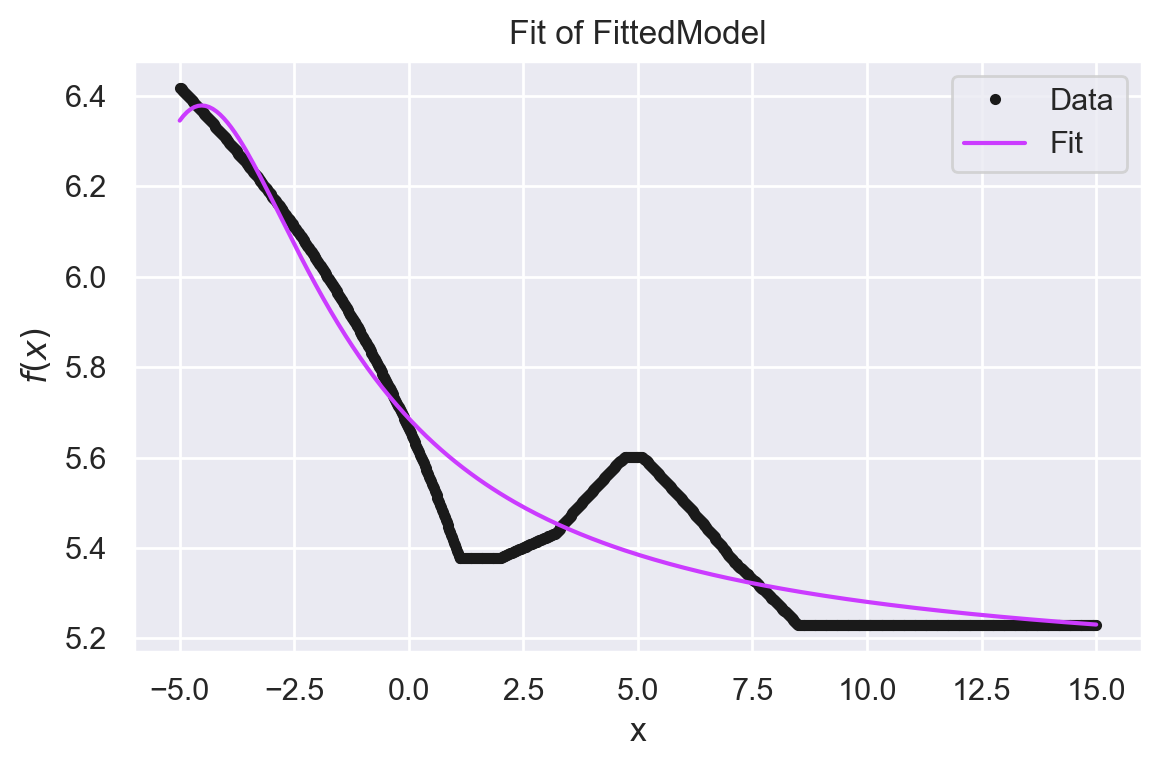

In [153]:
fitted_model_temp.plot()

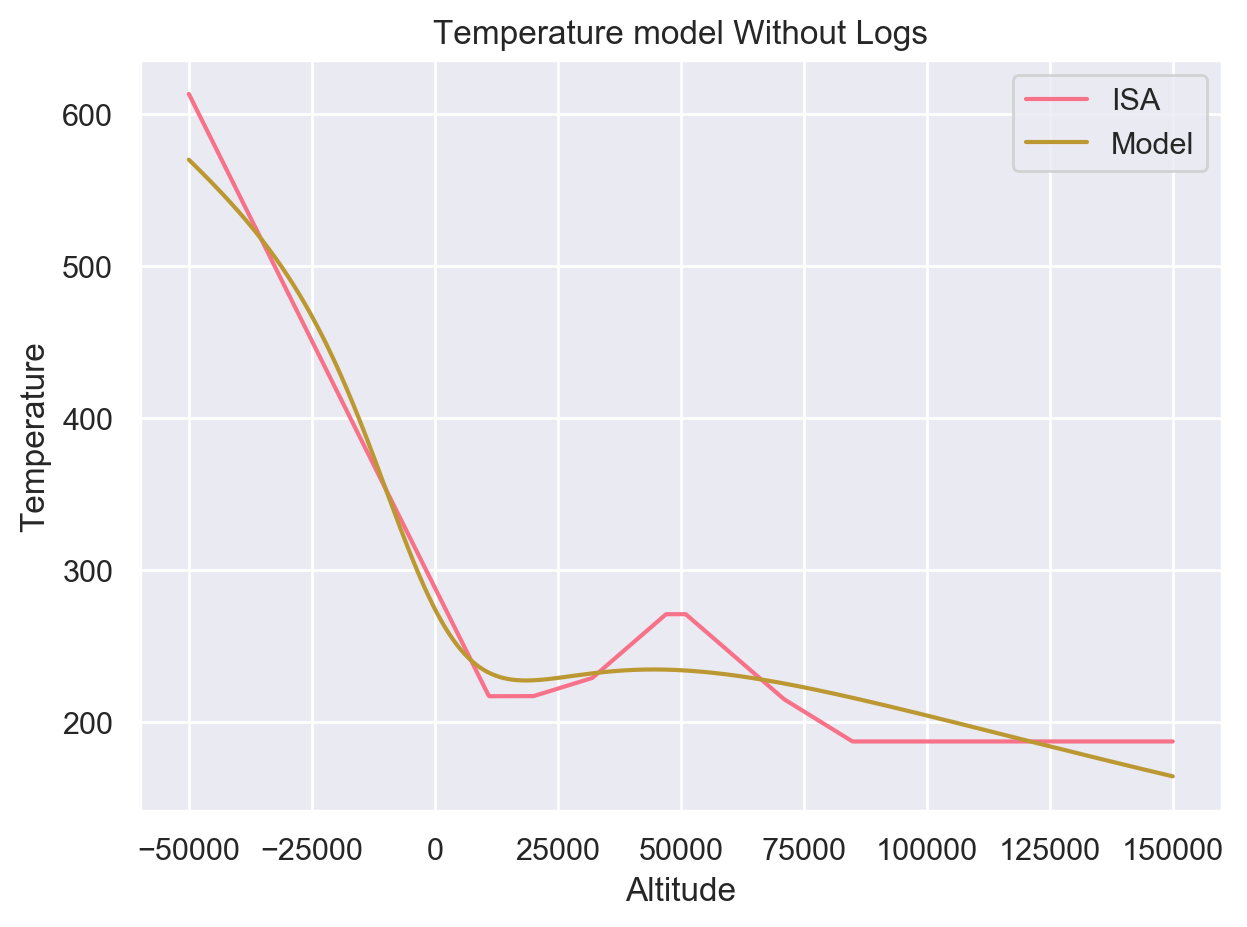

In [135]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, temperature_isa, label="ISA")
plt.plot(altitude, np.exp(fitted_model_temp(scaled_altitude)), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Temperature")
plt.title(r"Temperature model Without Logs")
plt.tight_layout()
plt.legend()
plt.show()

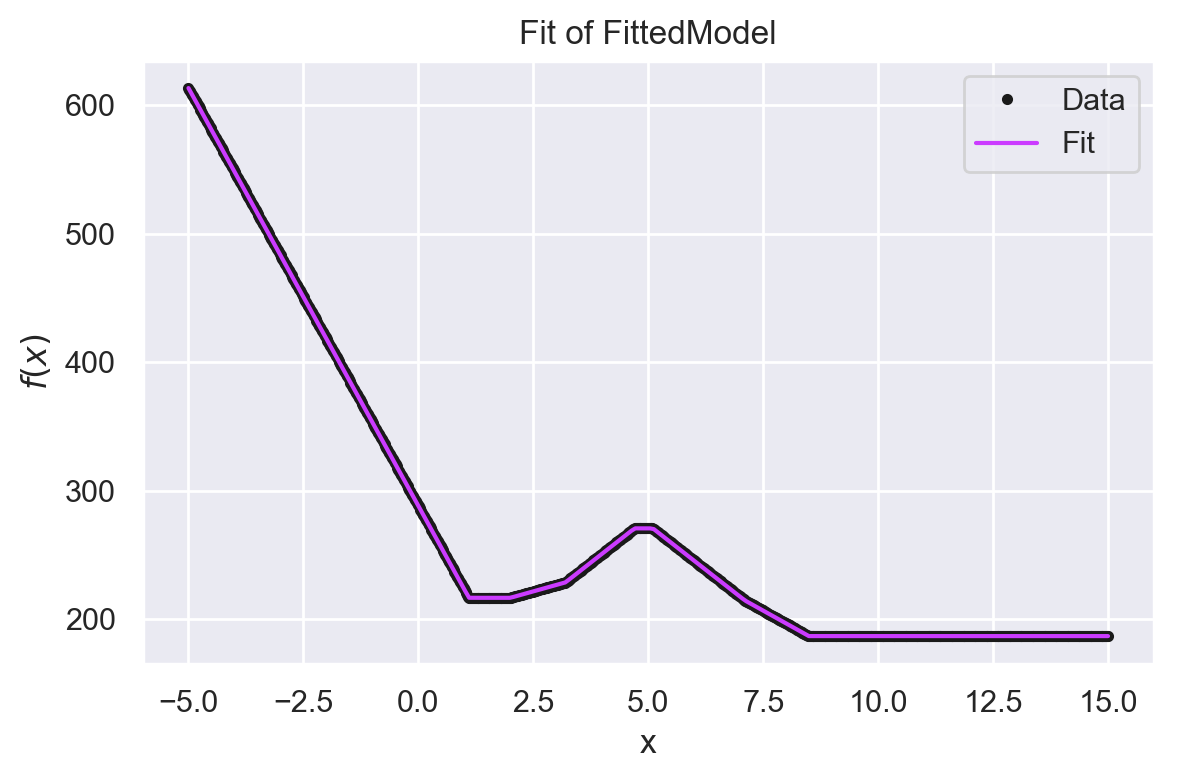

In [13]:

fitted_model_inter = InterpolatedModel(
    x_data_coordinates=scaled_altitude,
    y_data_structured=temperature_isa,
)
fitted_model_inter.plot()

In [23]:
altitudesnew=np.array([-50000, 11000,20000,32000,47000, 51000, 71000, 84852, 150000])
atmo_isa_new = Atmosphere(altitude=altitudesnew, type="isa")
temperature_isa_new = atmo_isa_new.temperature()
scaled_altitude_new=altitudesnew/10000

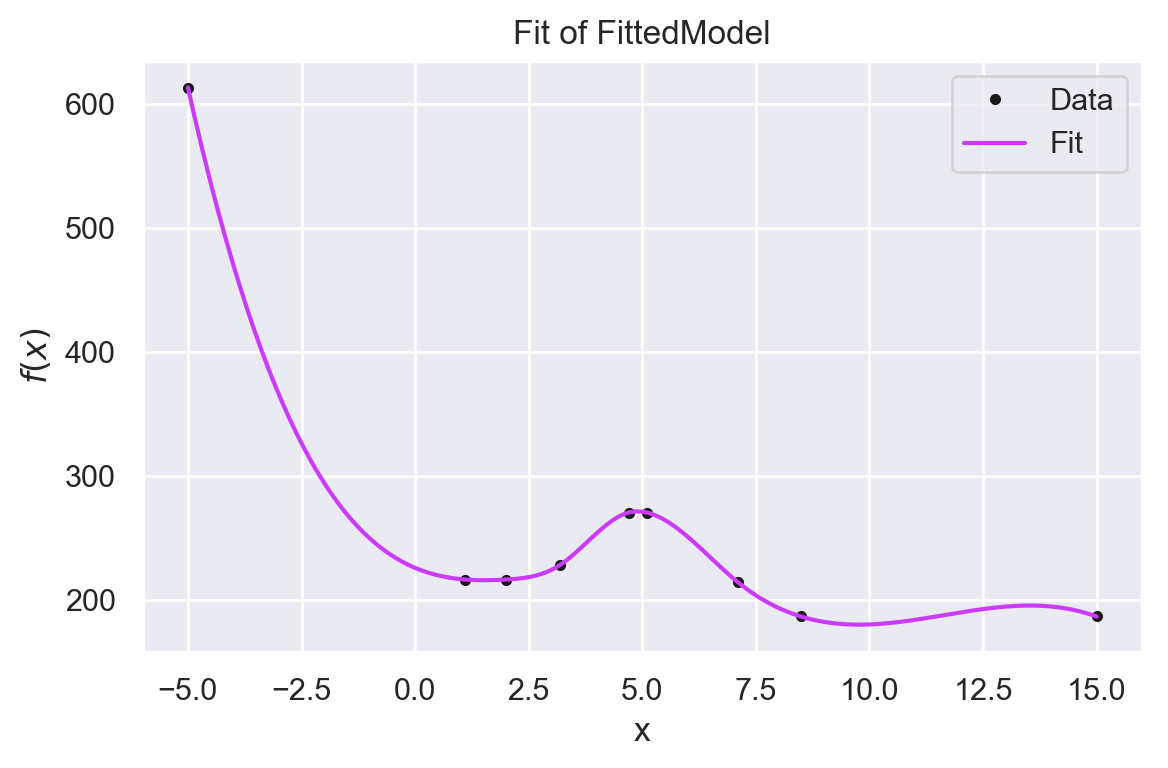

In [24]:
fitted_model_inter2 = InterpolatedModel(
    x_data_coordinates=scaled_altitude_new,
    y_data_structured=temperature_isa_new,
)
fitted_model_inter2.plot()

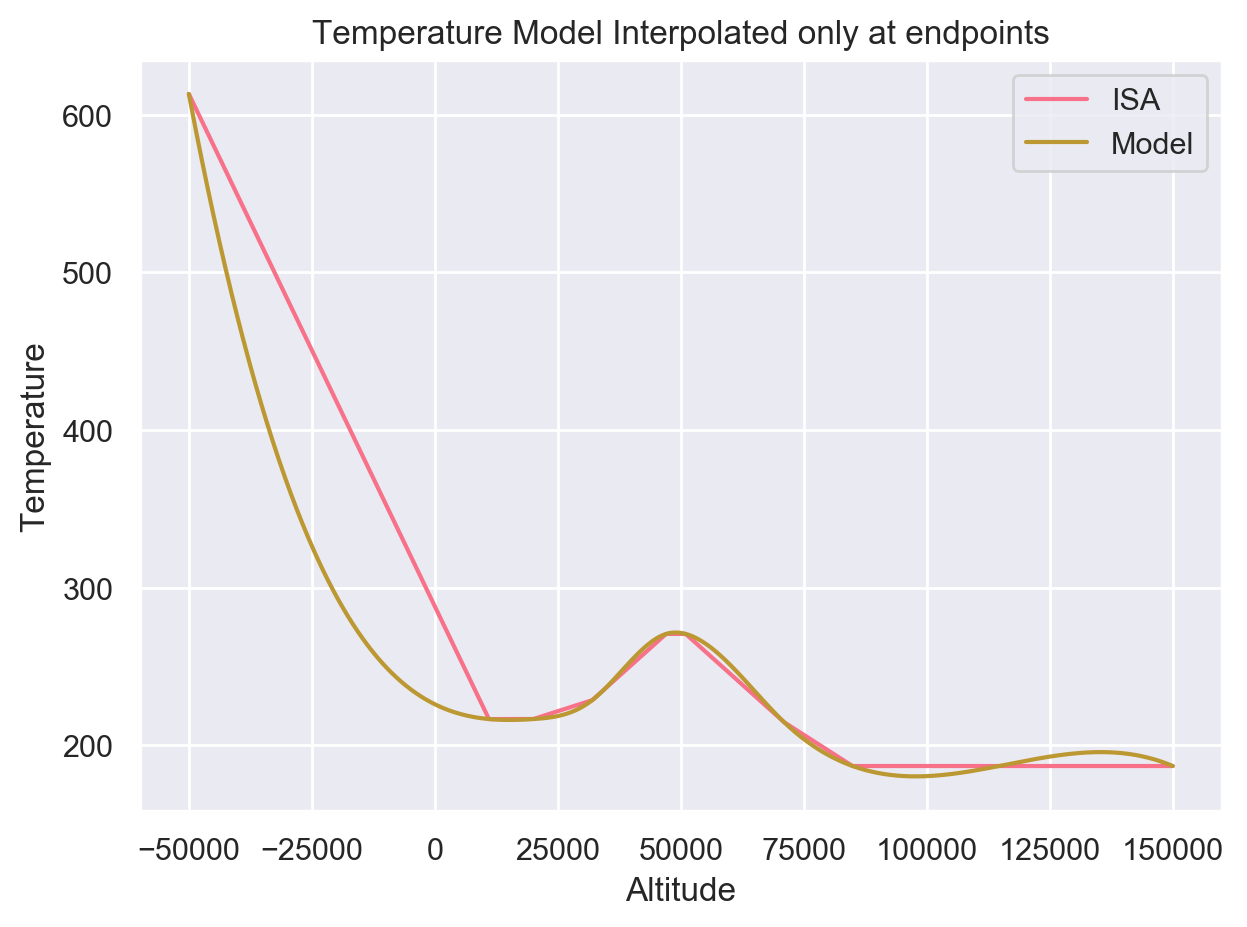

In [26]:

sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, temperature_isa, label="ISA")
plt.plot(altitude, fitted_model_inter2(scaled_altitude), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Temperature")
plt.title(r"Temperature Model Interpolated only at endpoints")
plt.tight_layout()
plt.legend()
plt.show()

In [40]:
altitude_inter = np.concatenate((np.linspace(-50e3, 9e3, 500),np.linspace(13e3, 18e3, 100),np.linspace(22e3, 30e3, 100),
np.linspace(34e3, 45e3, 100),np.linspace(48e3, 50e3, 100),np.linspace(53e3, 69e3, 100),np.linspace(73e3, 85e3, 100)
,np.linspace(89e3, 150e3, 500)), axis=0)
scaled_altitude_inter=altitude_inter/10000

In [47]:
atmo_isa_inter = Atmosphere(altitude=altitude_inter, type="isa")
temperature_isa_inter = atmo_isa_inter.temperature()
pressure_isa_inter=atmo_isa_inter.pressure()

In [75]:
np.save('atmspheretemps',temperature_isa_inter)

In [77]:
np.save('atmspherepressures',pressure_isa_inter)

In [76]:
np.load('atmspheretemps.npy')

array([613.15      , 612.38146293, 611.61292585, ..., 186.87      ,
       186.87      , 186.87      ])

In [72]:
temperature_isa_inter

array([613.15      , 612.38146293, 611.61292585, ..., 186.87      ,
       186.87      , 186.87      ])

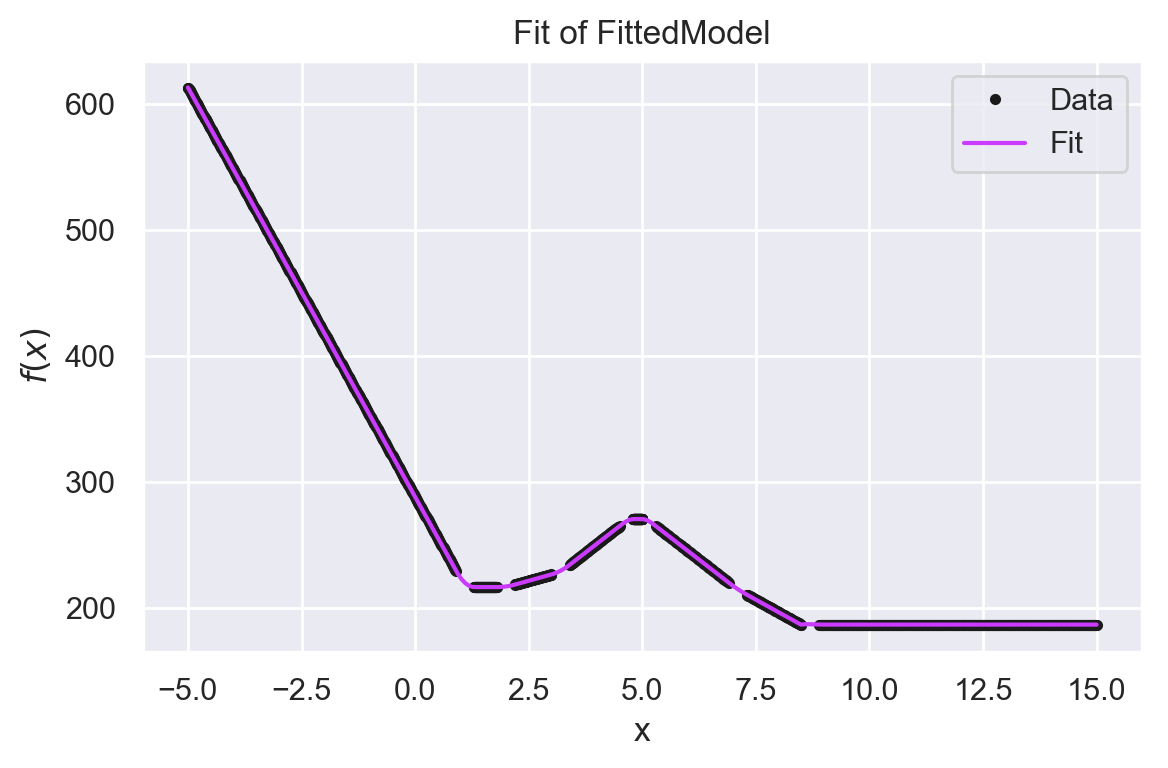

In [42]:
fitted_model_inter3 = InterpolatedModel(
    x_data_coordinates=scaled_altitude_inter,
    y_data_structured=temperature_isa_inter,
)
fitted_model_inter3.plot()

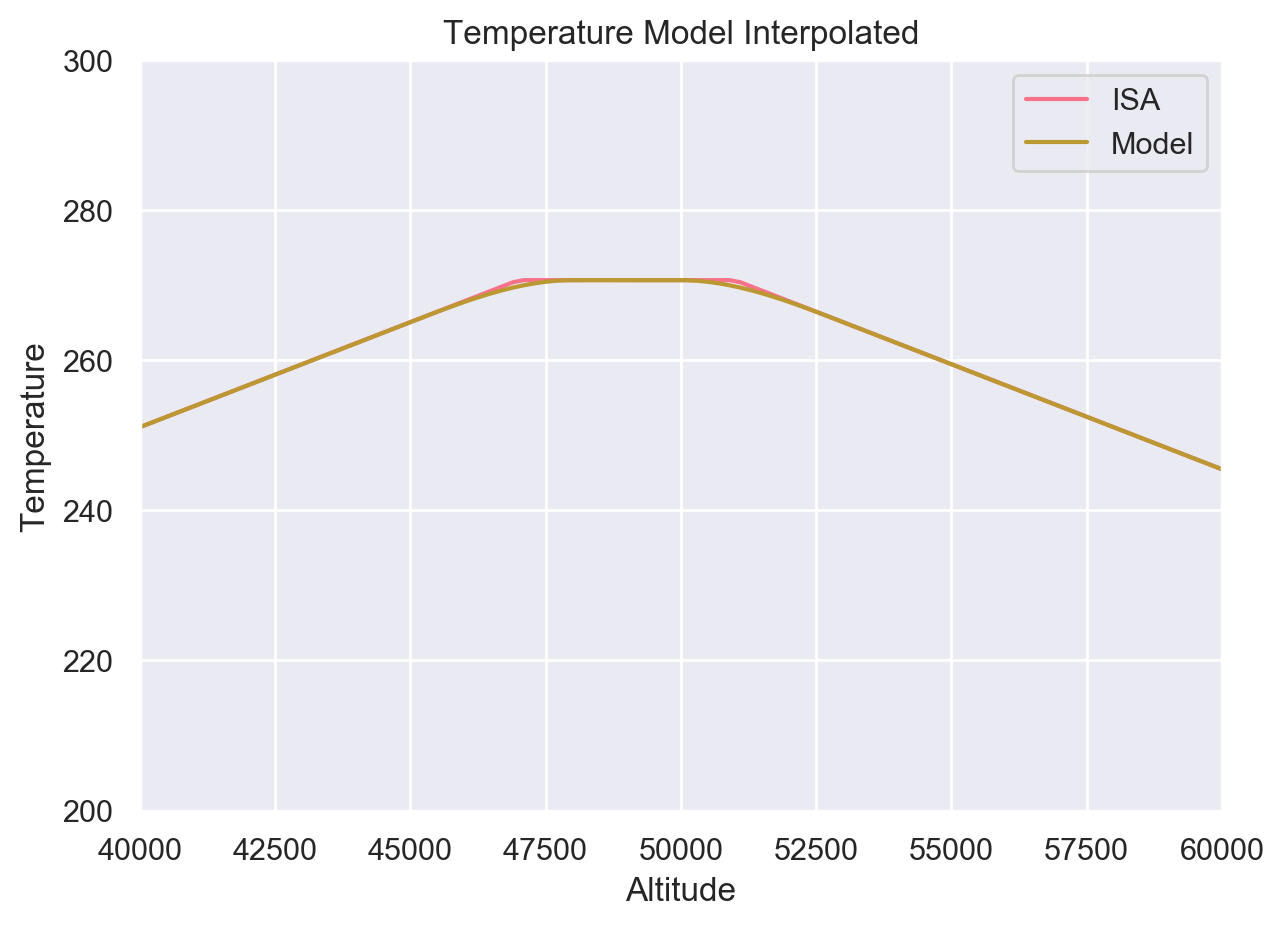

In [45]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, temperature_isa, label="ISA")
plt.plot(altitude, fitted_model_inter3(scaled_altitude), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Temperature")
plt.title(r"Temperature Model Interpolated")
plt.tight_layout()
plt.legend()
plt.xlim([40000, 60000])
plt.ylim([200, 300])
plt.show()

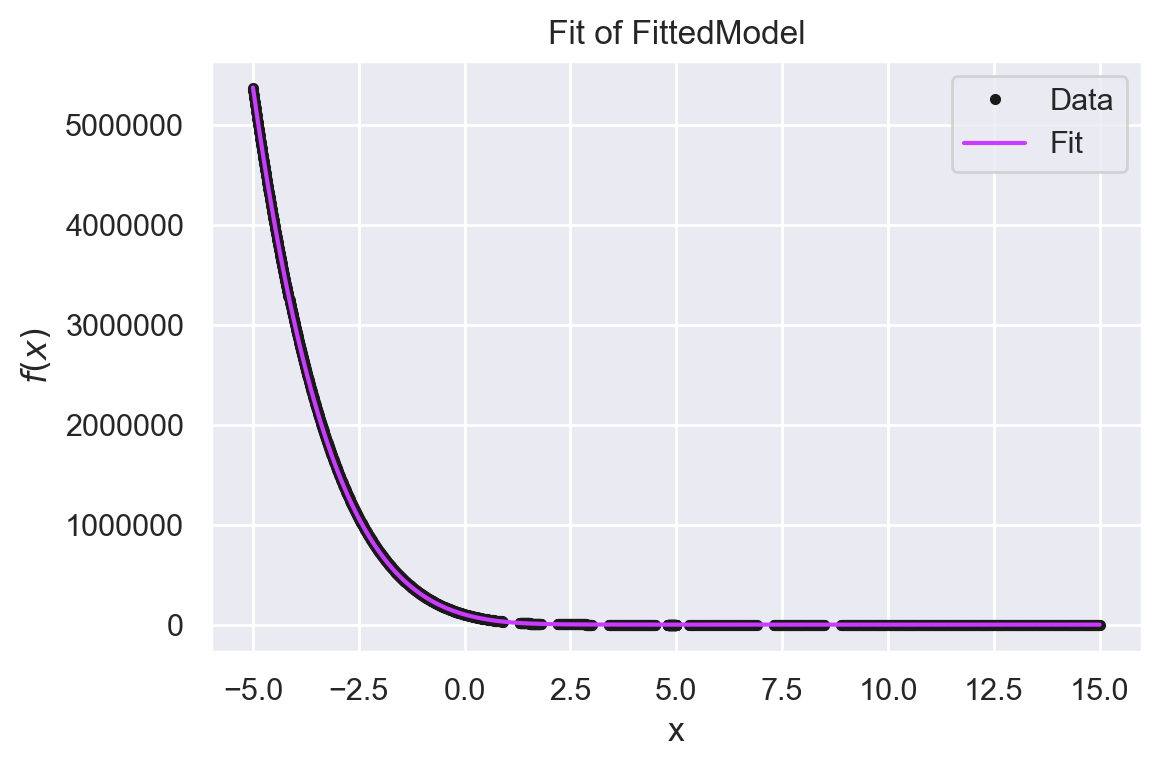

In [48]:
fitted_model_inter_pressure = InterpolatedModel(
    x_data_coordinates=scaled_altitude_inter,
    y_data_structured=pressure_isa_inter,
)
fitted_model_inter_pressure.plot()

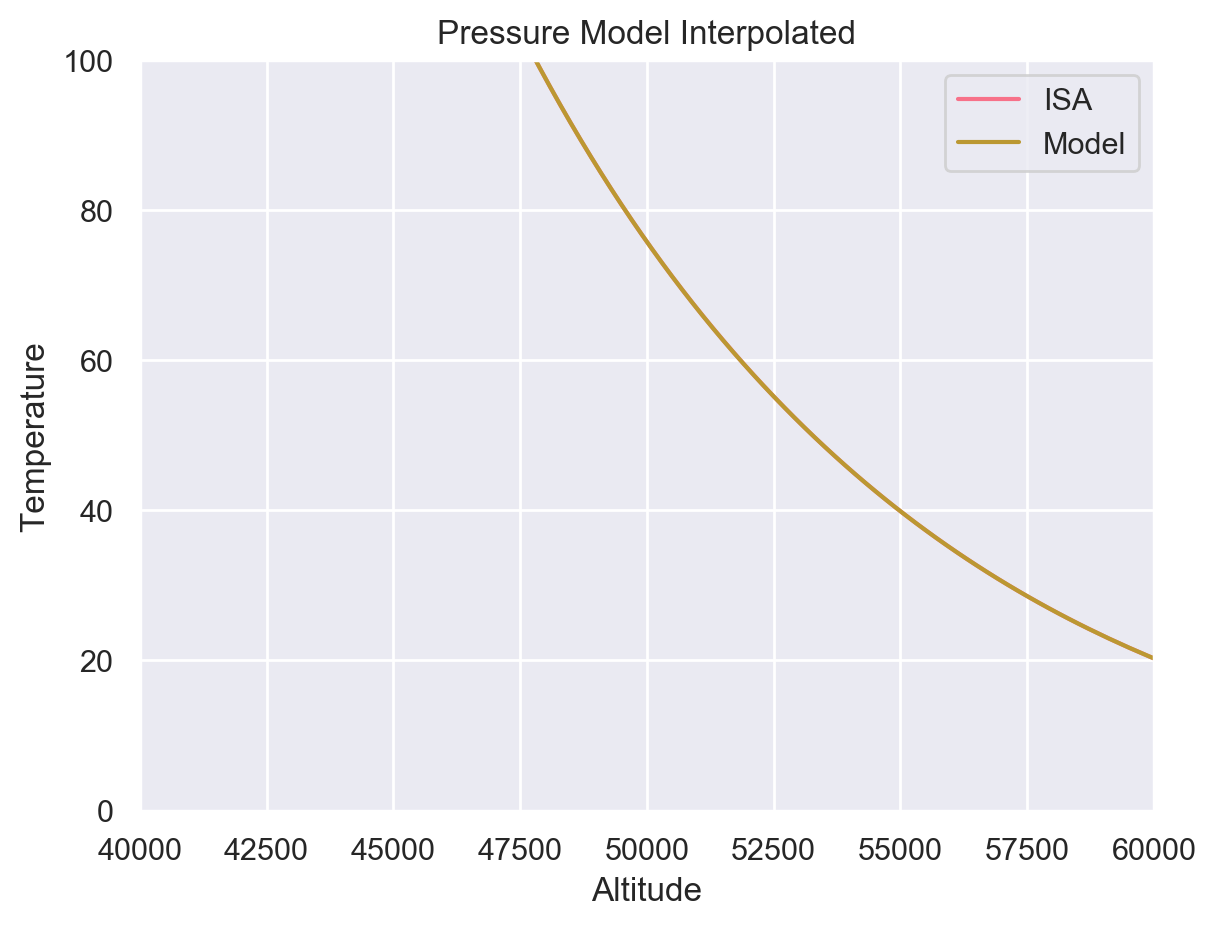

In [52]:
sns.set(palette=sns.color_palette("husl"))
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8), dpi=200)
plt.plot(altitude, pressure_isa, label="ISA")
plt.plot(altitude, fitted_model_inter_pressure(scaled_altitude), label="Model")
plt.xlabel(r"Altitude")
plt.ylabel(r"Temperature")
plt.title(r"Pressure Model Interpolated")
plt.tight_layout()
plt.legend()
plt.xlim([40000, 60000])
plt.ylim([0, 100])
plt.show()

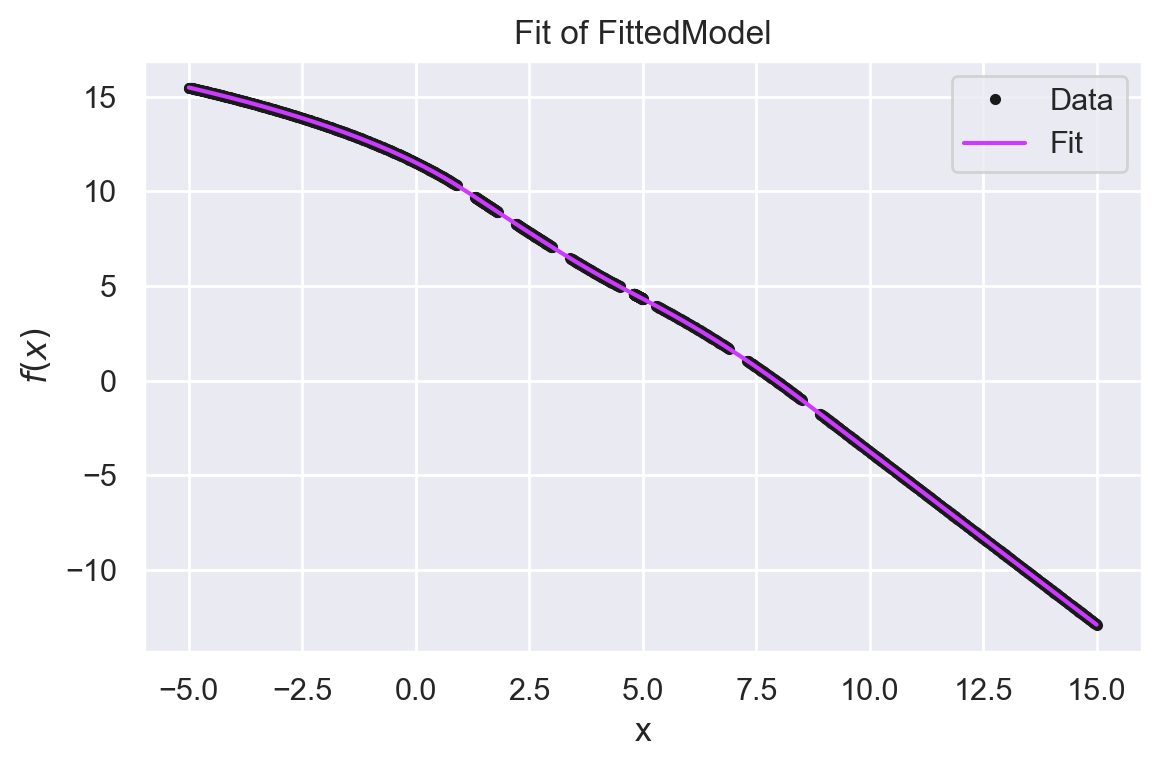

In [53]:
fitted_model_inter_pressure = InterpolatedModel(
    x_data_coordinates=scaled_altitude_inter,
    y_data_structured=np.log(pressure_isa_inter),
)
fitted_model_inter_pressure.plot()

In [81]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(temperature_isa, fitted_model_inter3(scaled_altitude))
rms

ImportError: cannot import name 'max_error' from 'sklearn.metrics' (/Users/Sylvershadowz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

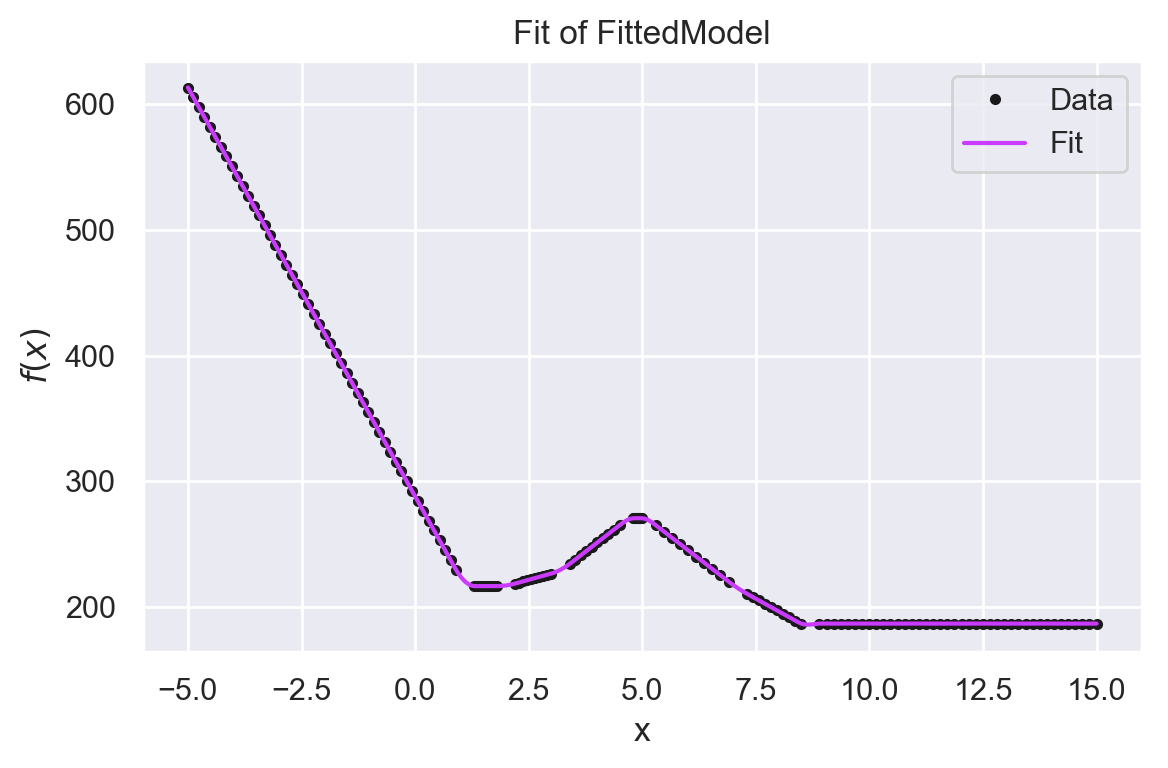

In [115]:
altitude_inter_test = np.concatenate((np.linspace(-50e3, 9e3, 50),np.linspace(13e3, 18e3, 10),np.linspace(22e3, 30e3, 10),
np.linspace(34e3, 45e3, 10),np.linspace(48e3, 50e3, 10),np.linspace(53e3, 69e3, 10),np.linspace(73e3, 85e3, 10)
,np.linspace(89e3, 150e3, 40)), axis=0)
scaled_altitude_inter_test=altitude_inter_test/10000

atmo_isa_inter_test = Atmosphere(altitude=altitude_inter_test, type="isa")
temperature_isa_inter_test = atmo_isa_inter_test.temperature()
pressure_isa_inter_test=atmo_isa_inter_test.pressure()

fitted_model_inter_test = InterpolatedModel(
    x_data_coordinates=scaled_altitude_inter_test,
    y_data_structured=temperature_isa_inter_test,
)
fitted_model_inter_test.plot()

In [107]:
np.save('atmspheretemps_inter',temperature_isa_inter_test)
np.save('atmspherepressures_inter',pressure_isa_inter_test)

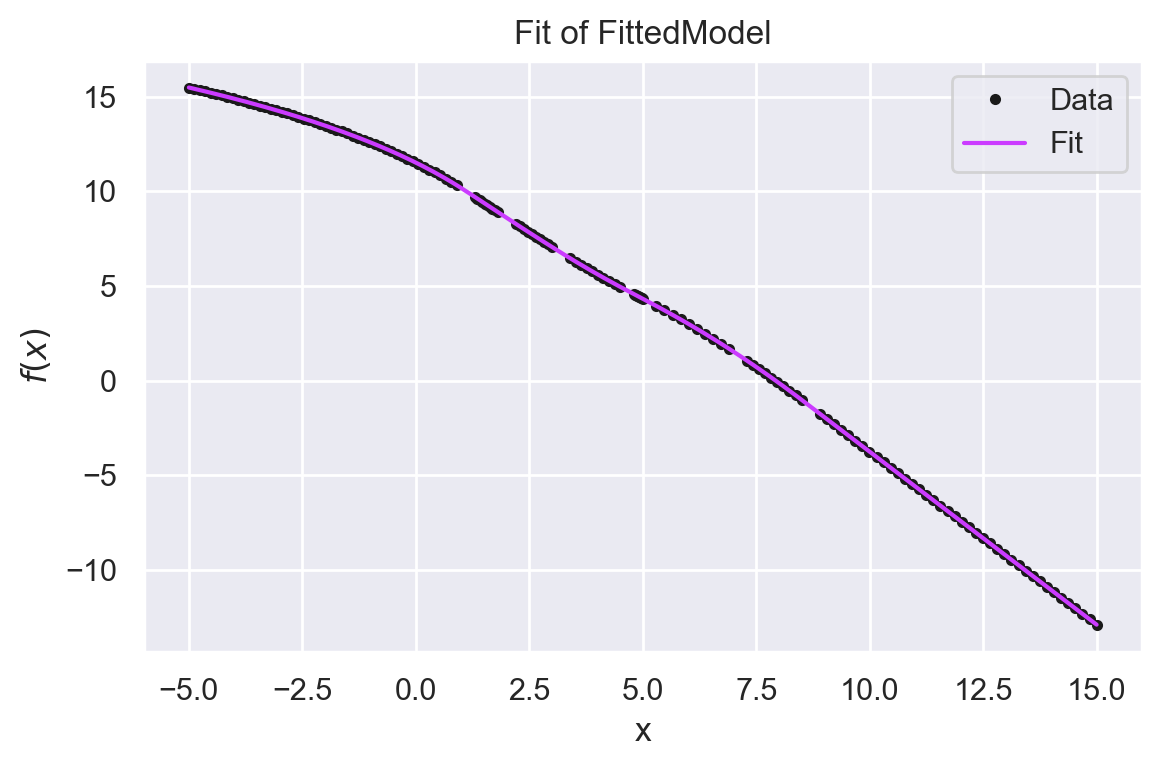

In [101]:
fitted_model_inter_test2 = InterpolatedModel(
    x_data_coordinates=scaled_altitude_inter_test,
    y_data_structured=np.log(pressure_isa_inter_test),
)
fitted_model_inter_test2.plot()

In [74]:
rms = mean_squared_error(temperature_isa, fitted_model_inter_test(scaled_altitude))
rms

0.07461954074756474

In [113]:
max(abs((temperature_isa- fitted_model_inter3(scaled_altitude))/temperature_isa))

0.014276322616772285

In [102]:
max((temperature_isa)- (fitted_model_inter_test(scaled_altitude)))

0.8449694781102437

In [103]:
min(temperature_isa- fitted_model_inter_test(scaled_altitude))

-3.4052434845818595

In [104]:
np.sum(abs(np.log(pressure_isa)- fitted_model_inter_test2(scaled_altitude)))

0.016049267512176762

In [105]:
min(np.log(pressure_isa)- fitted_model_inter_test2(scaled_altitude))

-0.0002747269573539768

In [114]:
max(abs((pressure_isa- np.exp(fitted_model_inter_test2(scaled_altitude)))/pressure_isa))

0.0005622072662930309